In [80]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib ipympl

from PIL import Image

from scipy.ndimage import convolve, correlate, uniform_filter, gaussian_filter, median_filter, rotate
from scipy.ndimage import prewitt, sobel, laplace

from skimage import filters
from skimage.data import camera
from skimage.util import random_noise
from skimage import feature

Apartado 1:

In [81]:
#Para comenzar, voy a definir una función para mostrar las imágenes y no tener que estar repitiendo código constantemente.
def mostrarImg(file):
    img = Image.open(file)
    
    img = img.reduce(10) #Reducimos la imagen para poder ver mejor los bordes
    print('formato:', img.format)
    print('(ancho, alto) =', img.size)
    print('modo: ', img.mode)

    plt.figure()
    plt.imshow(img, cmap='gray')

    img = np.array(img, dtype='float')
    img = img/255

formato: None
(ancho, alto) = (720, 240)
modo:  L


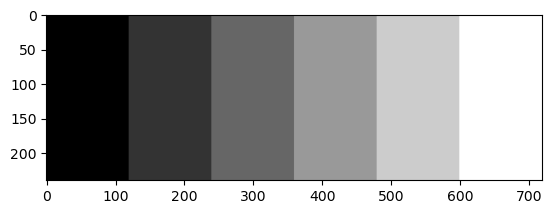

In [82]:
#Comenzamos a mostrar las imágenes con la función que hemos definido anteriormente
mostrarImg('images/gray_bands.tif')


formato: None
(ancho, alto) = (112, 84)
modo:  L


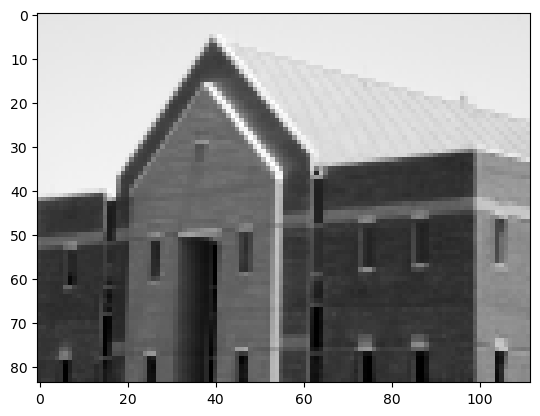

In [83]:
mostrarImg('images/building.tif')

formato: None
(ancho, alto) = (52, 52)
modo:  L


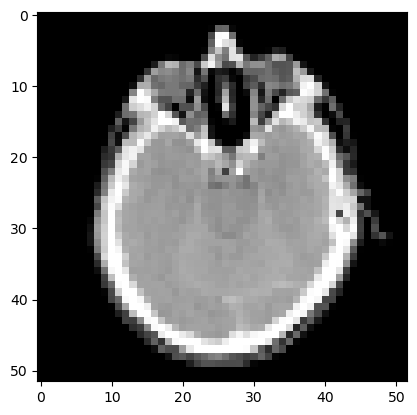

In [84]:
mostrarImg('images/head_CT.tif')

**Apartado 2:**

Para realizar este apartado, debemos usar los operadores de gradiente. Estos son:
Filtros de Prewitt, de Sobel, y Derivada de Gaussiana. 

Vamos a comenzar con Prewitt

In [85]:
#Para comenzar, debemos pasar la imagen a numPy para poder operar con ella. También debemos pasarla a float y la dividimos entre su máximo para tenerla definida entre 0 y 1.

In [86]:
img1 = Image.open('images/gray_bands.tif')
img1 = img1.reduce(10)
img1 = np.array(img1, dtype='float')
img1 = img1/img1.max()


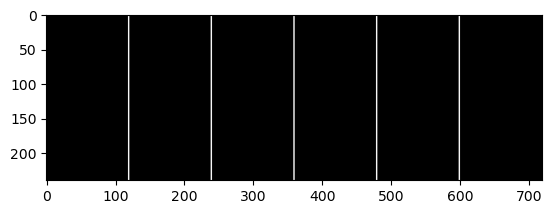

In [87]:
plt.imshow(filters.prewitt(img1), cmap='gray')

Ahora, lo hacemos con Sobel

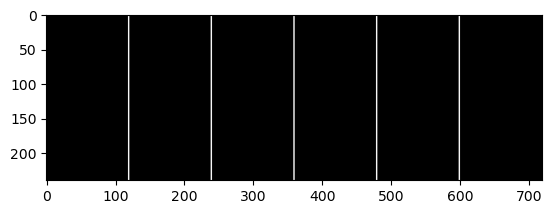

In [88]:
plt.imshow(sobel(img1),cmap='gray')

Y, por último, con la derivada Gaussiana

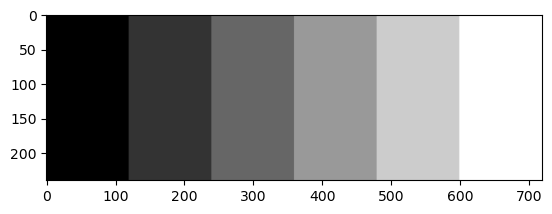

In [90]:
plt.imshow(gaussian_filter(img1, 0.4), cmap='gray')

**Apartado 3:** 

Vamos a ver los bordes con el operador de Laplaciana.

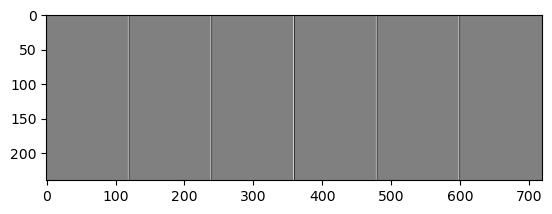

In [11]:
img1_lpl = laplace(img1)
plt.imshow(img1_lpl, cmap='gray')

Ahora, los bordes se siguen viendo bastante finos y se aprecian peor que con los anteriores. También se puede ver una gran diferencia y es que ahora estamos mostrándolo con el fondo en gris. 

Tener los bordes tan finos es bueno, debido a que así podemos ser más precisos o más exactos, aunque nosotros los veamos peor con nuestros ojos. 

**Apartado 4:**

Para añadir ruido gaussiano a la imagen debemos usar una función de numpy : numpy.random.normal
Y en esta función, podemos introducir por parámetros la media (loc), la desviación típica(scale) y el tamaño de la imagen (size).

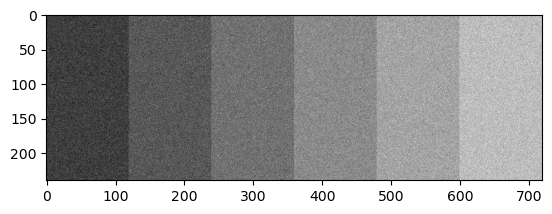

In [12]:
#Vamos a comenzar con la primera imagen

ruido1 = np.random.normal(loc=0.0, scale=0.1, size=img1.shape)
img1_ruido = img1 + ruido1
plt.imshow(img1_ruido, cmap='gray')

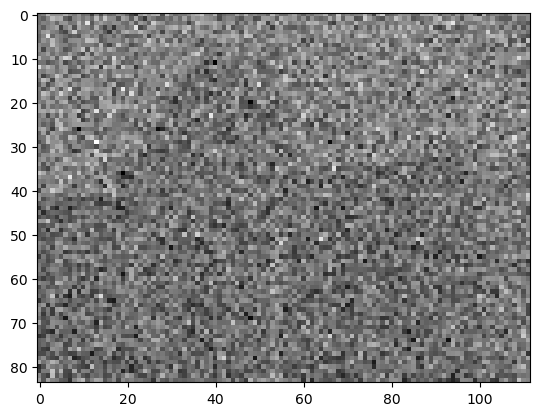

In [13]:
#Seguimos con la segunda imagen (Esta debemos abrirla, pasarla a numpy y dividirla como hemos hecho con la otra anteriormente)

img2 = Image.open('images/building.tif')
img2 = img2.reduce(10)
img2 = np.array(img2, dtype='float')
img2 = img2/img2.max()

ruido2 = np.random.normal(loc=0.0, scale=0.9, size=img2.shape)
img2_ruido = img2 + ruido2
plt.imshow(img2_ruido, cmap='gray')

#Ahora en esta imagen, voy a ponerle una desviación típica mayor. Por lo tanto, la imagen se verá peor

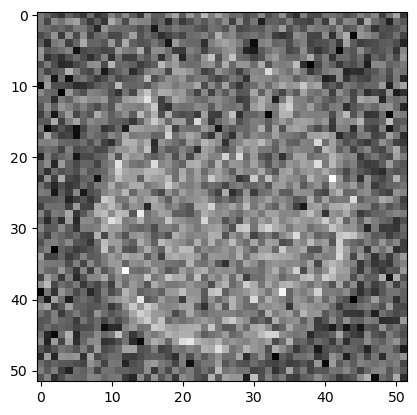

In [79]:
#Y por último, vamos con la tercera imagen
img3 = Image.open('images/head_CT.tif')
img3 = img3.reduce(10)
img3 = np.array(img3, dtype='float')
img3 = img3/img3.max()

ruido3 = np.random.normal(loc=0.0, scale=0.5, size=img3.shape)
img3_ruido = img3 + ruido3
plt.imshow(img3_ruido, cmap='gray')

#Aquí he puesto una desviación típica menor que en la segunda, pero mayor que en la primera. Como podemos comprobar se puede apreciar algo de la imagen, peor muy mal debido al ruido que le hemos añadido.
#Cabe destacar que en la segunda imagen, no podemos distinguir absolutamente nada debido al ruido mencionado, ya que la desviació típica es muy grande. 

**Apartado 5:**

Vamos a comenzar aplicando los operadores de gradiente a las imágenes con ruido.

Comenzaremos con Prewitt:

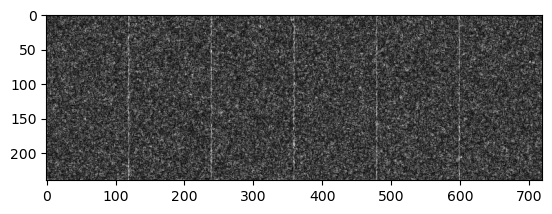

In [15]:
plt.imshow(filters.prewitt(img1_ruido), cmap='gray')

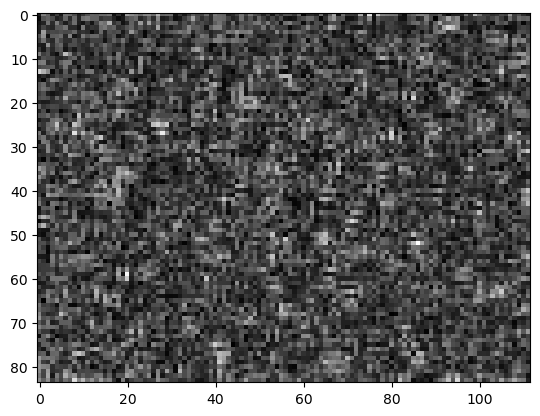

In [16]:
plt.imshow(filters.prewitt(img2_ruido), cmap='gray')

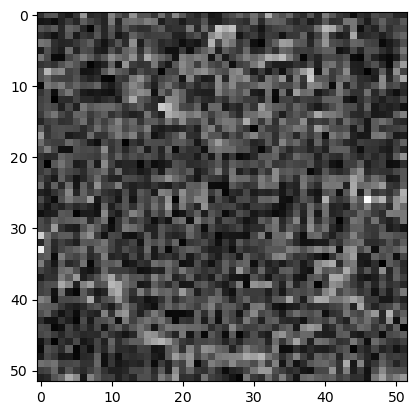

In [17]:
plt.imshow(filters.prewitt(img3_ruido), cmap='gray')

Al añadirle ruido, es más complicado detectar los bordes. Dónde mejor lo podemos ver es en la 2º imagen, ya que la desviación típica es mayor cuando hemos definido el ruido y, por lo tanto, no podemos ver nada. 

Vamos a continuar con Sobel: 

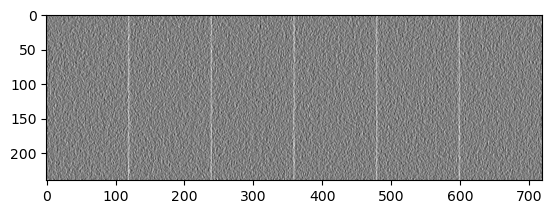

In [18]:
plt.imshow(sobel(img1_ruido),cmap='gray')

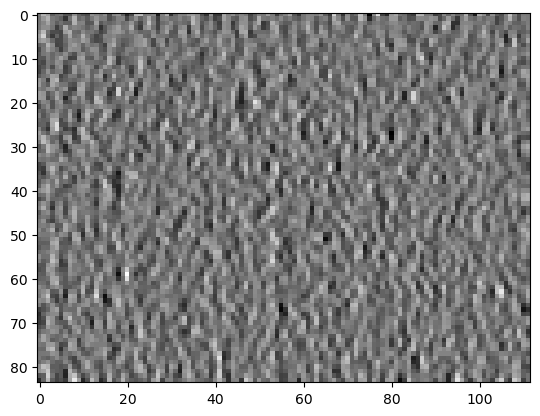

In [19]:
plt.imshow(sobel(img2_ruido),cmap='gray')

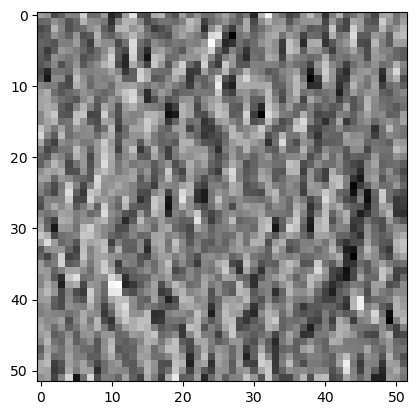

In [20]:
plt.imshow(sobel(img3_ruido),cmap='gray')

Con este filtro, podemos ver los bordes un poco mejor, porque realiza un promediado implícitamente. Pero, nos vuelve a ocurrir lo mismo que con el anterior, los bordes no se pueden apreciar correctamente. 

Y, por último, con la derivada Gaussiana:

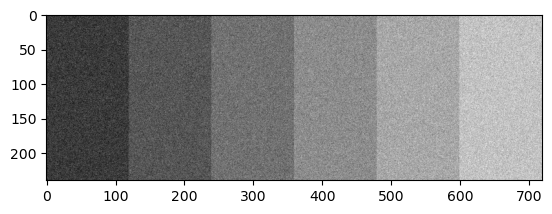

In [78]:
plt.imshow(gaussian_filter(img1_ruido, 0.4), cmap='gray')

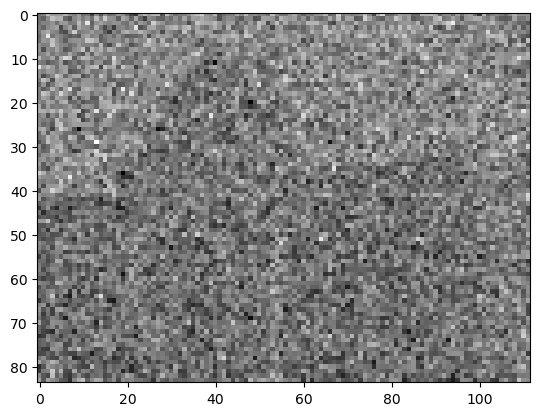

In [77]:
plt.imshow(gaussian_filter(img2_ruido, 0.4), cmap='gray')

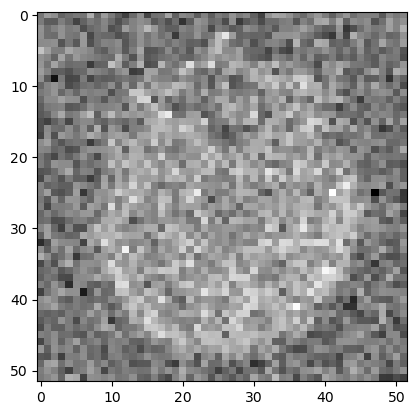

In [76]:
plt.imshow(gaussian_filter(img3_ruido, 0.4), cmap='gray')

Y, por último, con la derivada Gaussiana nos vuelve a ocurrir lo mismo, como era de esperar.

**Apartado 6:**

Para comenzar, vamos a aplicar un filtro gaussiano antes de aplicar los operadores de gradiente.

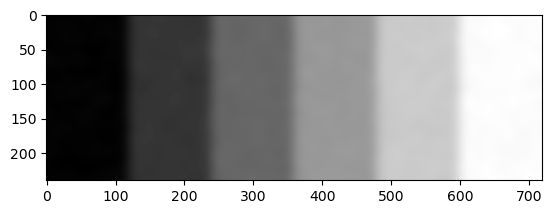

In [116]:
img1_gauss = gaussian_filter(img1_ruido, 8)
plt.imshow((img1_gauss),cmap='gray')

Ahora, vamos a aplicar los operadores de gradiente. 

Comenzaremos con Prewitt

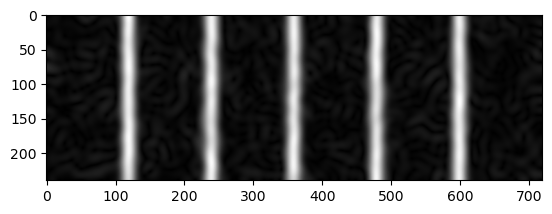

In [117]:
plt.imshow(filters.prewitt(img1_gauss), cmap='gray')

Y, ahora con Sobel: 

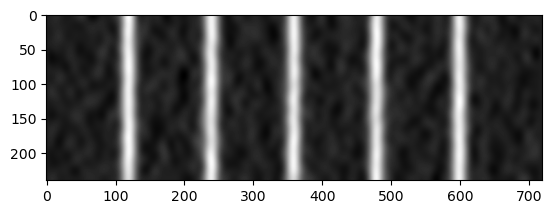

In [118]:
plt.imshow(sobel(img1_gauss),cmap='gray')

Como podemos ver, aplicando este método, podemos destacar mucho mejor los bordes. 

**Apartado 7:**

In [126]:
img2 = Image.open('images/building.tif')
img2 = np.array(img2, dtype='uint8')

In [127]:
edges1 = feature.canny(img2, sigma=1)
edges2 = feature.canny(img2, sigma=3)

Text(0.5, 1.0, 'Imagen building con Canny filter, $\\sigma=1$')

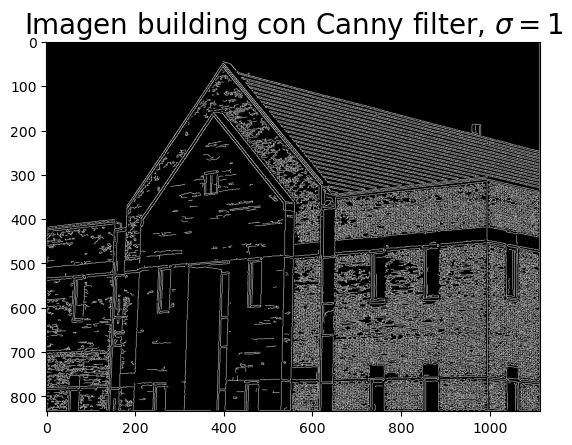

In [128]:
plt.imshow(edges1, cmap='gray')
plt.title(r'Imagen building con Canny filter, $\sigma=1$', fontsize=20)

Text(0.5, 1.0, 'Imagen building con Canny filter, $\\sigma=3$')

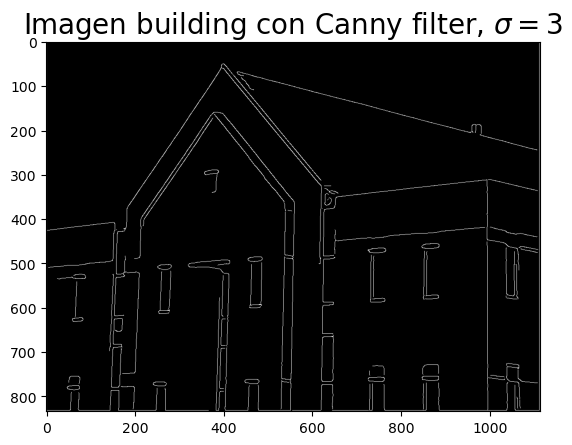

In [129]:
plt.imshow(edges2, cmap='gray')
plt.title(r'Imagen building con Canny filter, $\sigma=3$', fontsize=20)

Hemos usado el detector de Canny con dos sigmas diferentes. Como podemos ver con el sigma más bajo nos quedamso con más bordes y con los más finos. Pero aumentando el signa nos quedamos con los bordes principales, aunque perdemos algunos. 

Ahora, vamos a ver la otra imagen con el detector de Canny: 

In [136]:
img3 = Image.open('images/head_CT.tif')
img3 = np.array(img3, dtype='uint8')

In [141]:
edges11 = feature.canny(img3, sigma=1)
edges22 = feature.canny(img3, sigma=8)

Text(0.5, 1.0, 'Imagen head_CT con Canny filter, $\\sigma=1$')

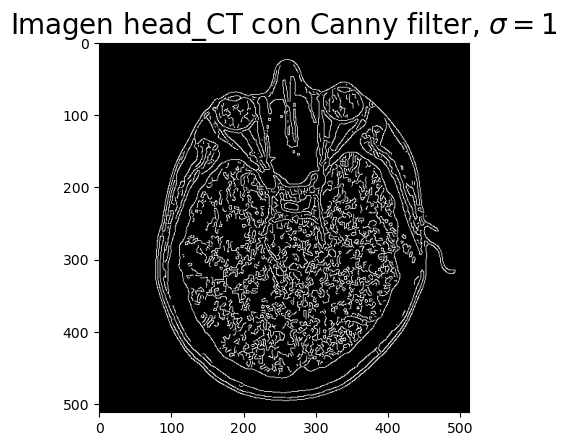

In [142]:
plt.imshow(edges11, cmap='gray')
plt.title(r'Imagen head_CT con Canny filter, $\sigma=1$', fontsize=20)

Text(0.5, 1.0, 'Imagen head_CT con Canny filter, $\\sigma=8$')

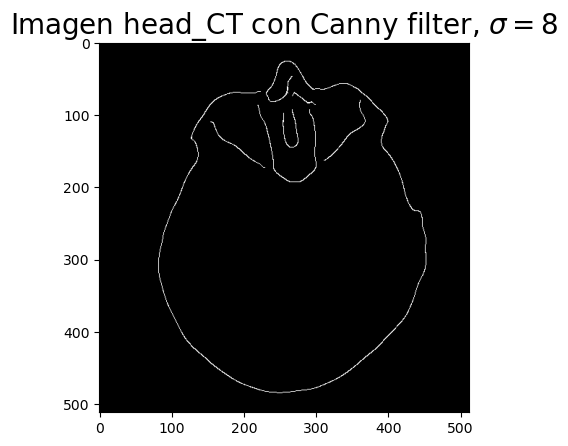

In [143]:
plt.imshow(edges22, cmap='gray')
plt.title(r'Imagen head_CT con Canny filter, $\sigma=8$', fontsize=20)

Con esta imagen podemos ver que con el detector de Canny y usando un sigma = 1, podemos obtener unos increíbles resultados. En el segundo caso, hemos usado un sigma bastante grande para poder quedarnos con el borde exterior que es el principal. 